In [ ]:
# Michigan Hackers Machine Learning Team
# Project: Simple Linear Regression of yoe:sal.csv
# Description: Find linear relationship between years of experience vs salary
# Author: Sachchit Kunichetty
# Date: October 8th, 2020

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%notebook

UsageError: the following arguments are required: filename


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# Import Dataset
data = pd.read_csv("yoe_sal.csv")
data

FileNotFoundError: ignored

In [1]:
# Implement Gradient Descent
#GD(X values, Y vlaues, learning rate, epochs)
def gd(x, y, alpha, epochs):
    theta = np.zeros(x[1].shape)
    err = [] # a list of errors to track GD progress
    m = len(x) # number of features
    for i in range(epochs):
        hx = np.dot(x, theta) # hypotheses for each feature
        dy = y - hx # error
        err.append(np.mean(dy))
        grad = 2*np.dot(dy, x)/m # gradient calculation
        theta += alpha * grad # parameter update
    return theta, err

In [ ]:
# maps the data points to a power+1 dimension vector, makes a n-dimensional feature for the array
def poly_dim(X, power = 1):
    Phi = np.array([[x ** p for p in range(power + 1)] for x in X])
    return Phi

In [ ]:
def MSE(X, theta, Y):
    return np.sum(Y - np.dot(X, theta))**2/len(X)

In [ ]:
# Plot Data

<IPython.core.display.Javascript object>


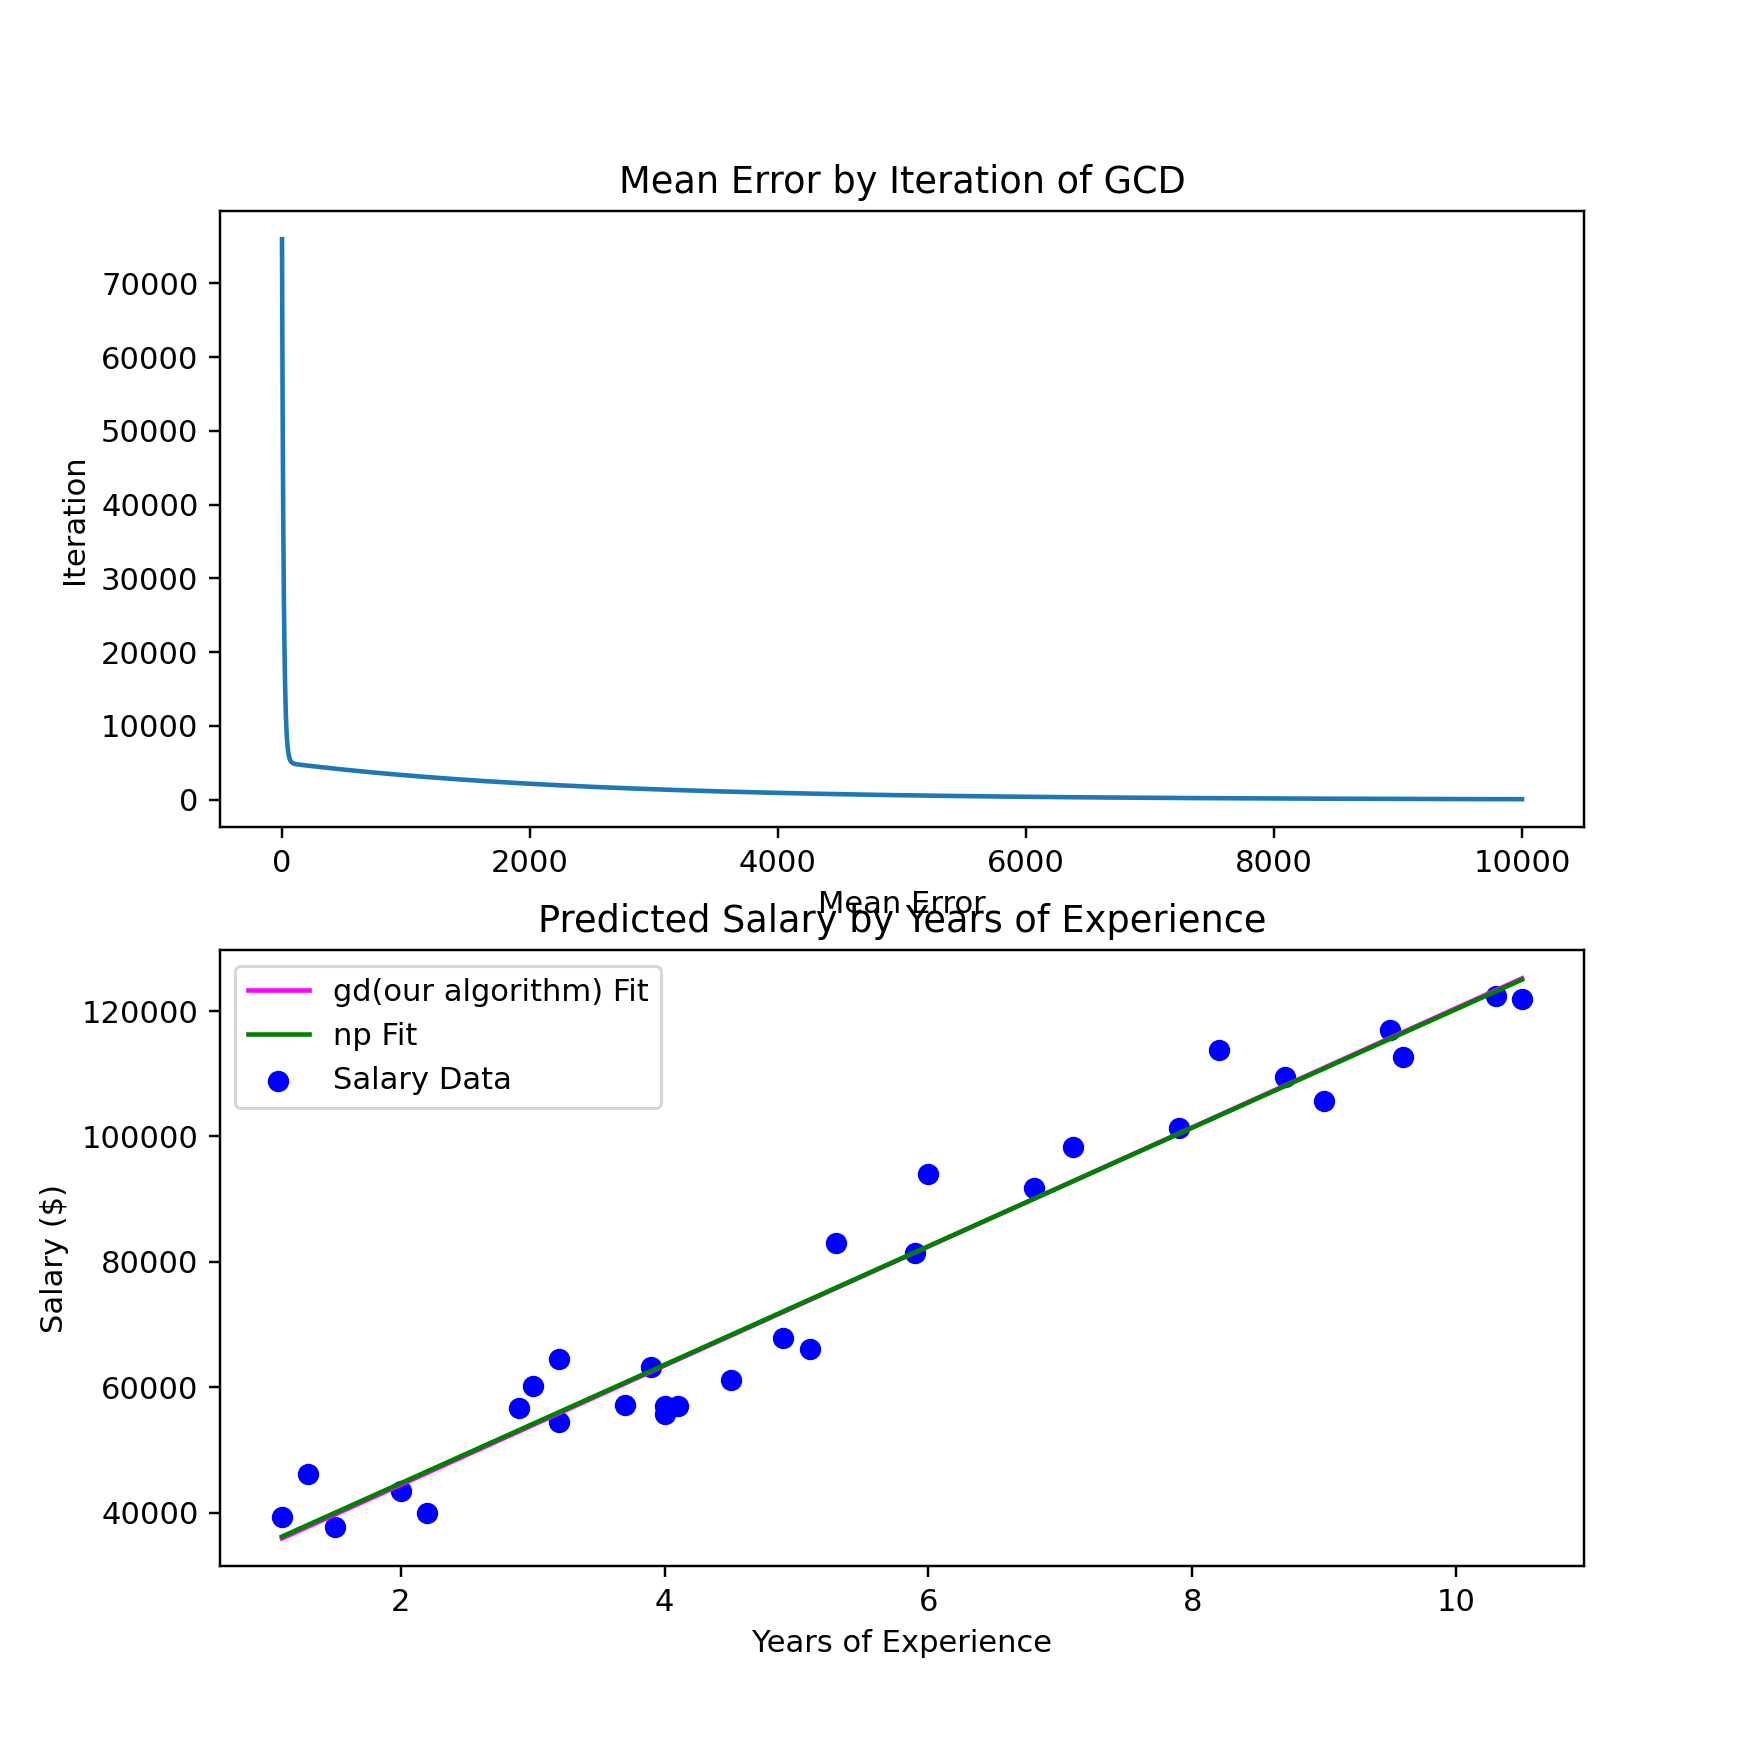

Text(0.5, 1.0, 'Mean Error by Iteration of GCD')

In [ ]:
X = data["YearsExperience"].to_numpy()
Y = data["Salary"].to_numpy()
num_iter = 10000
alpha = 10**-3
Phi = poly_dim(X, 1) # maps this data to include y intercept
theta, err = gd(Phi, Y, alpha, num_iter)
fig, ax = plt.subplots(2, figsize=(8,8))
ax[1].scatter(X, Y, color="blue", label="Salary Data")
ax[1].plot(X, np.dot(Phi, theta), color="magenta", label="gd(our algorithm) Fit")
m_np, b_np = np.polyfit(X, Y, 1)
ax[1].plot(X, m_np * X + b_np, color="green", label="np Fit")
ax[1].set_xlabel("Years of Experience")
ax[1].set_ylabel("Salary ($)")
ax[1].set_title("Predicted Salary by Years of Experience")
ax[1].legend()

ax[0].plot(range(num_iter), err)
ax[0].set_xlabel("Mean Error")
ax[0].set_ylabel("Iteration")
ax[0].set_title("Mean Error by Iteration of GCD")

In [ ]:
# trying higher dim fitting with World Happiness Index Data
data2 = pd.read_csv("2017.csv")
X = data2[["Economy..GDP.per.Capita.", "Health..Life.Expectancy."]].to_numpy()
Y = data2["Happiness.Score"].to_numpy()
num_iter = 1000000
alpha = 10**-2
# theta, err = gd(X, Y, alpha, num_iter)
data2

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


<IPython.core.display.Javascript object>


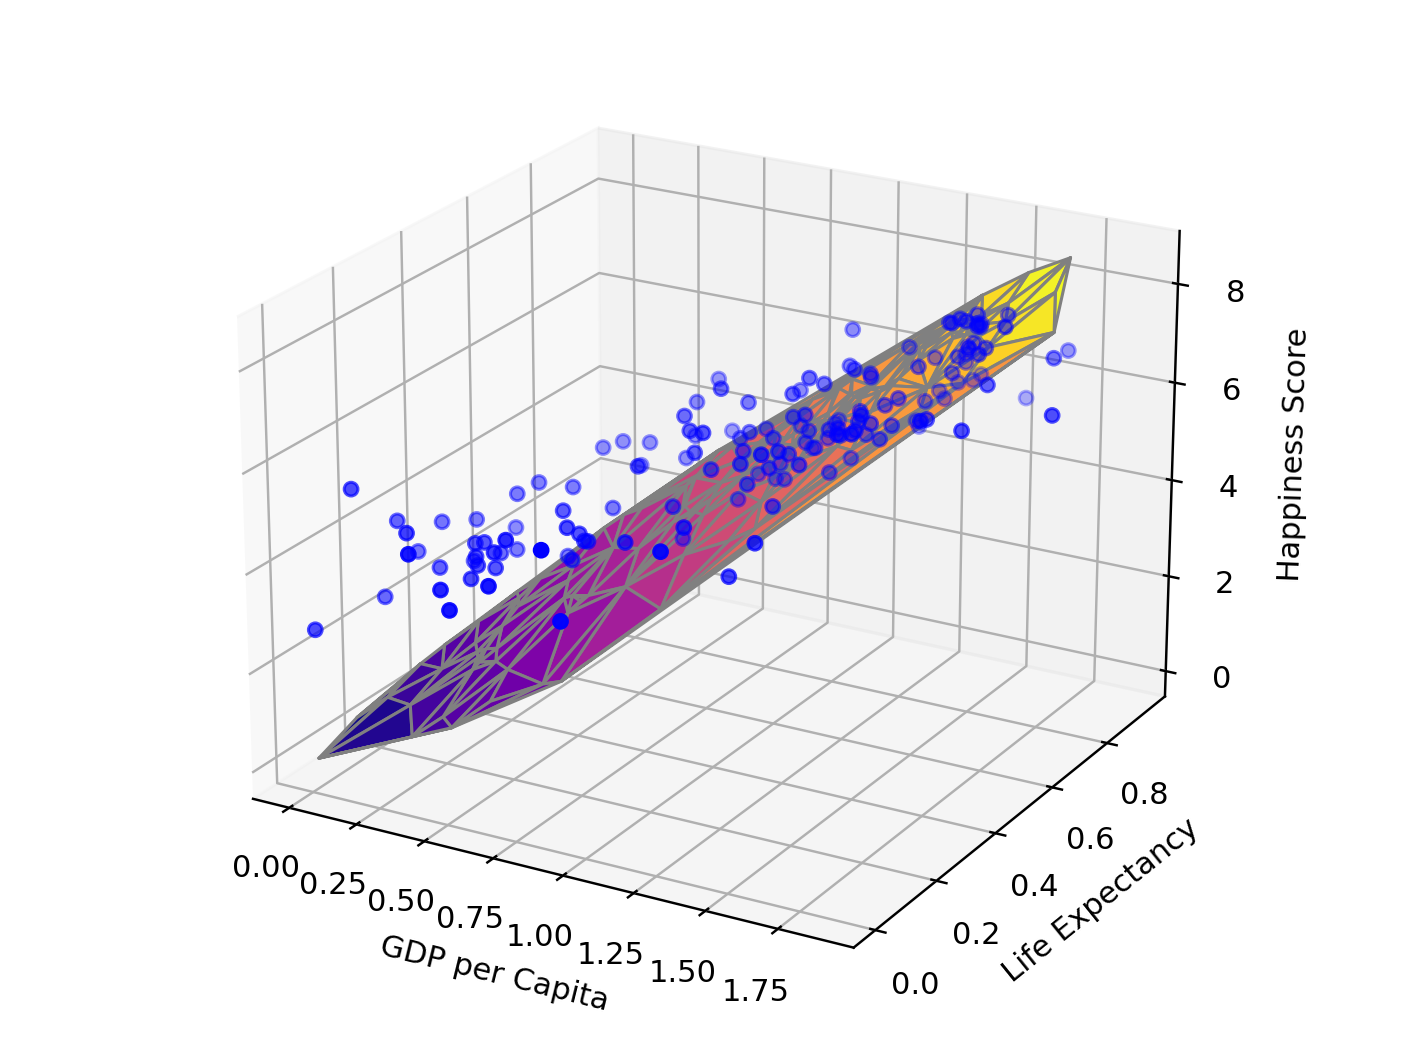

Text(0.5, 0.92, 'Happiness Score by GDP per Capita and Life Expectancy')

In [ ]:
def f(X, Y, theta):
    z = []
    for x, y in zip(X, Y):
        z.append(np.dot(np.vstack((x, y)).T, theta))
    return np.array(z)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:, 1], Y, color="blue", label="Happiness Data")
XM, YM = np.meshgrid(X[:, 0], X[:, 1])
ZM = f(XM, YM, theta)
ax.plot_trisurf(X[:,0], X[:,1], np.dot(X, theta), edgecolor="gray", cmap="plasma")
ax.view_init(45, -45)
ax.set_xlabel("GDP per Capita")
ax.set_ylabel("Life Expectancy")
ax.set_zlabel("Happiness Score")
ax.set_title("Happiness Score by GDP per Capita and Life Expectancy")